# This notebook shows how to do regression analysis using Boston housing price dataset

Boston housing dataset contains the following 13 features:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population

And the following output variable:
- MEDV Median value of owner-occupied homes in $1000’s

In [87]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [90]:
np.random.seed(42)

### Load Boston dataset

In [93]:
X, Y = load_boston(return_X_y=True, )
X.shape, Y.shape

((506, 13), (506,))

In [121]:
# an alternative way to load Boston dataset:
boston = load_boston()
X = boston.data
Y = boston.target

print (X)
print (Y)
X.shape, Y.shape

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

((506, 13), (506,))

In [99]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [102]:
boston_df = pd.DataFrame(X,columns=boston.feature_names)
boston_df['MEDV'] = Y
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [105]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LOGLSTAT,LOGDIS,LOGAGE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,2.370965,1.188032,4.090803
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.600891,0.539547,0.610740
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.548121,0.121864,1.064711
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.938729,0.742021,3.807217
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,2.430097,1.165473,4.350275
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,2.830563,1.646399,4.544092
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,3.636796,2.495393,4.605170


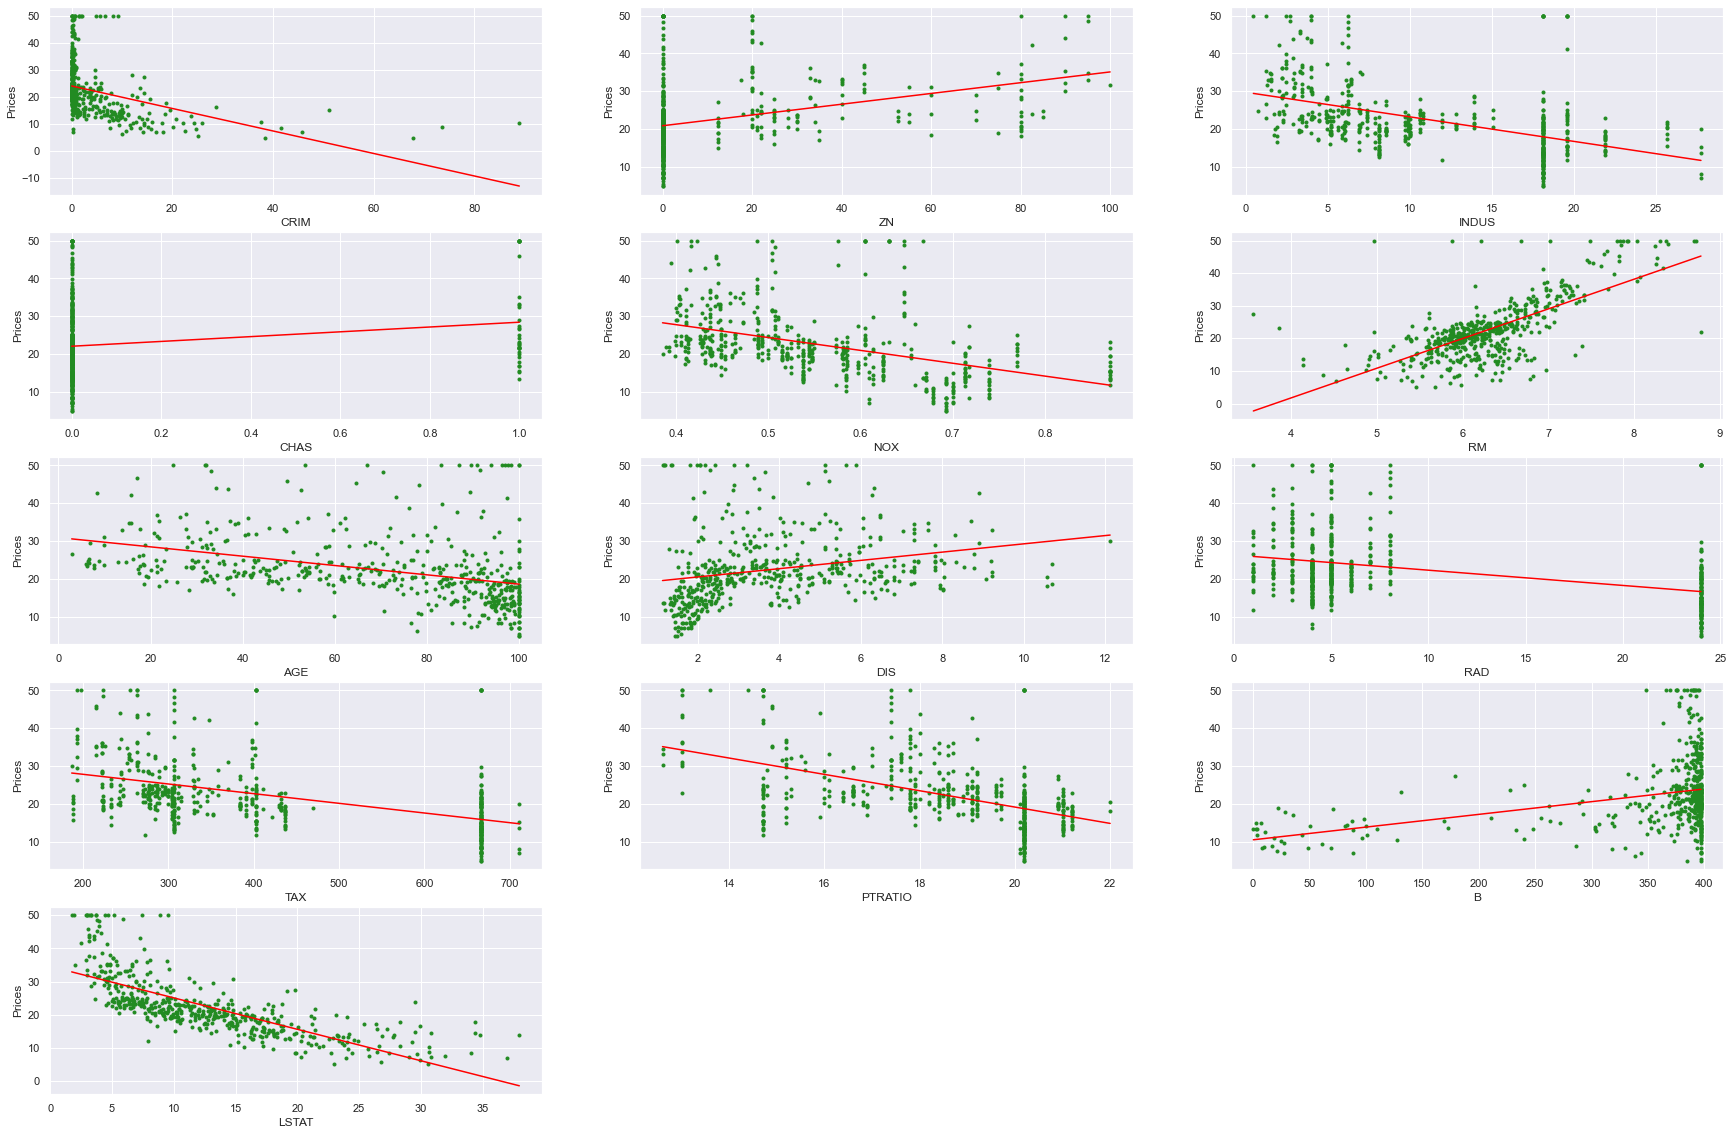

In [108]:
plt.figure(figsize=(30,20))
for i, col in enumerate(boston_df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = boston_df[col]
    y = boston_df['MEDV']
    plt.plot(x, y, '.', color="forestgreen")
    # create linear regression line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('Prices')

/home/hiraditya/Desktop/HomeWork/SJSU/cs156/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/home/hiraditya/Desktop/HomeWork/SJSU/cs156/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probability Density')

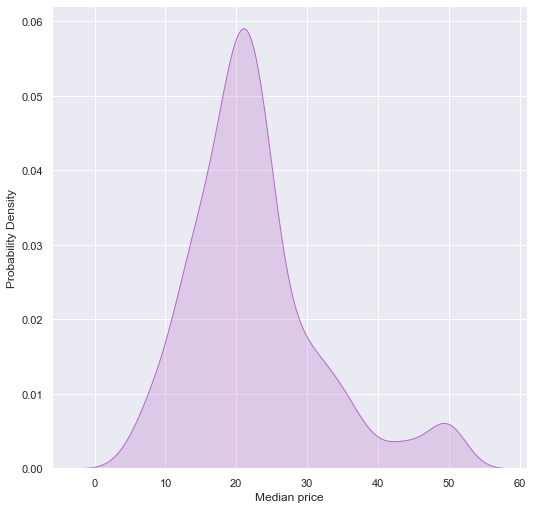

In [111]:
sns.kdeplot(boston_df['MEDV'], color='#b667c9', shade=True, Label='Boston housing prices')
plt.xlabel('Median price') 
plt.ylabel('Probability Density') 

<AxesSubplot:>

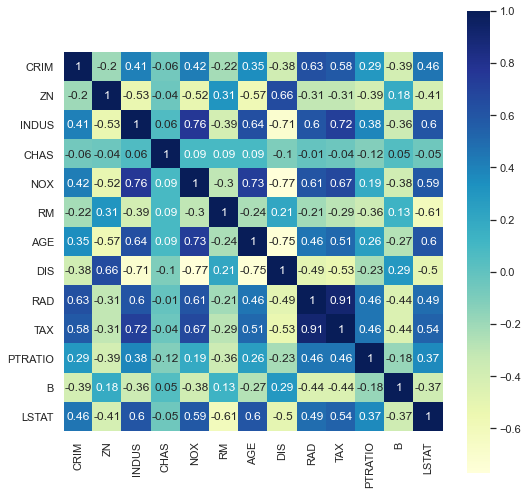

In [114]:
features = boston_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

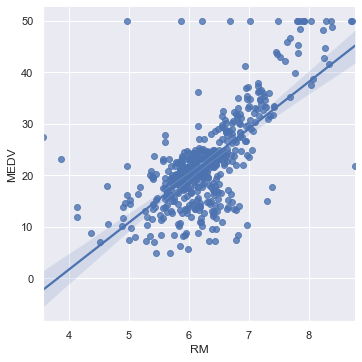

In [117]:
# rooms vs. price
sns.lmplot(x = 'RM', y = 'MEDV', data = boston_df)

### Split into training-test sets

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((404, 13), (404,), (102, 13), (102,))

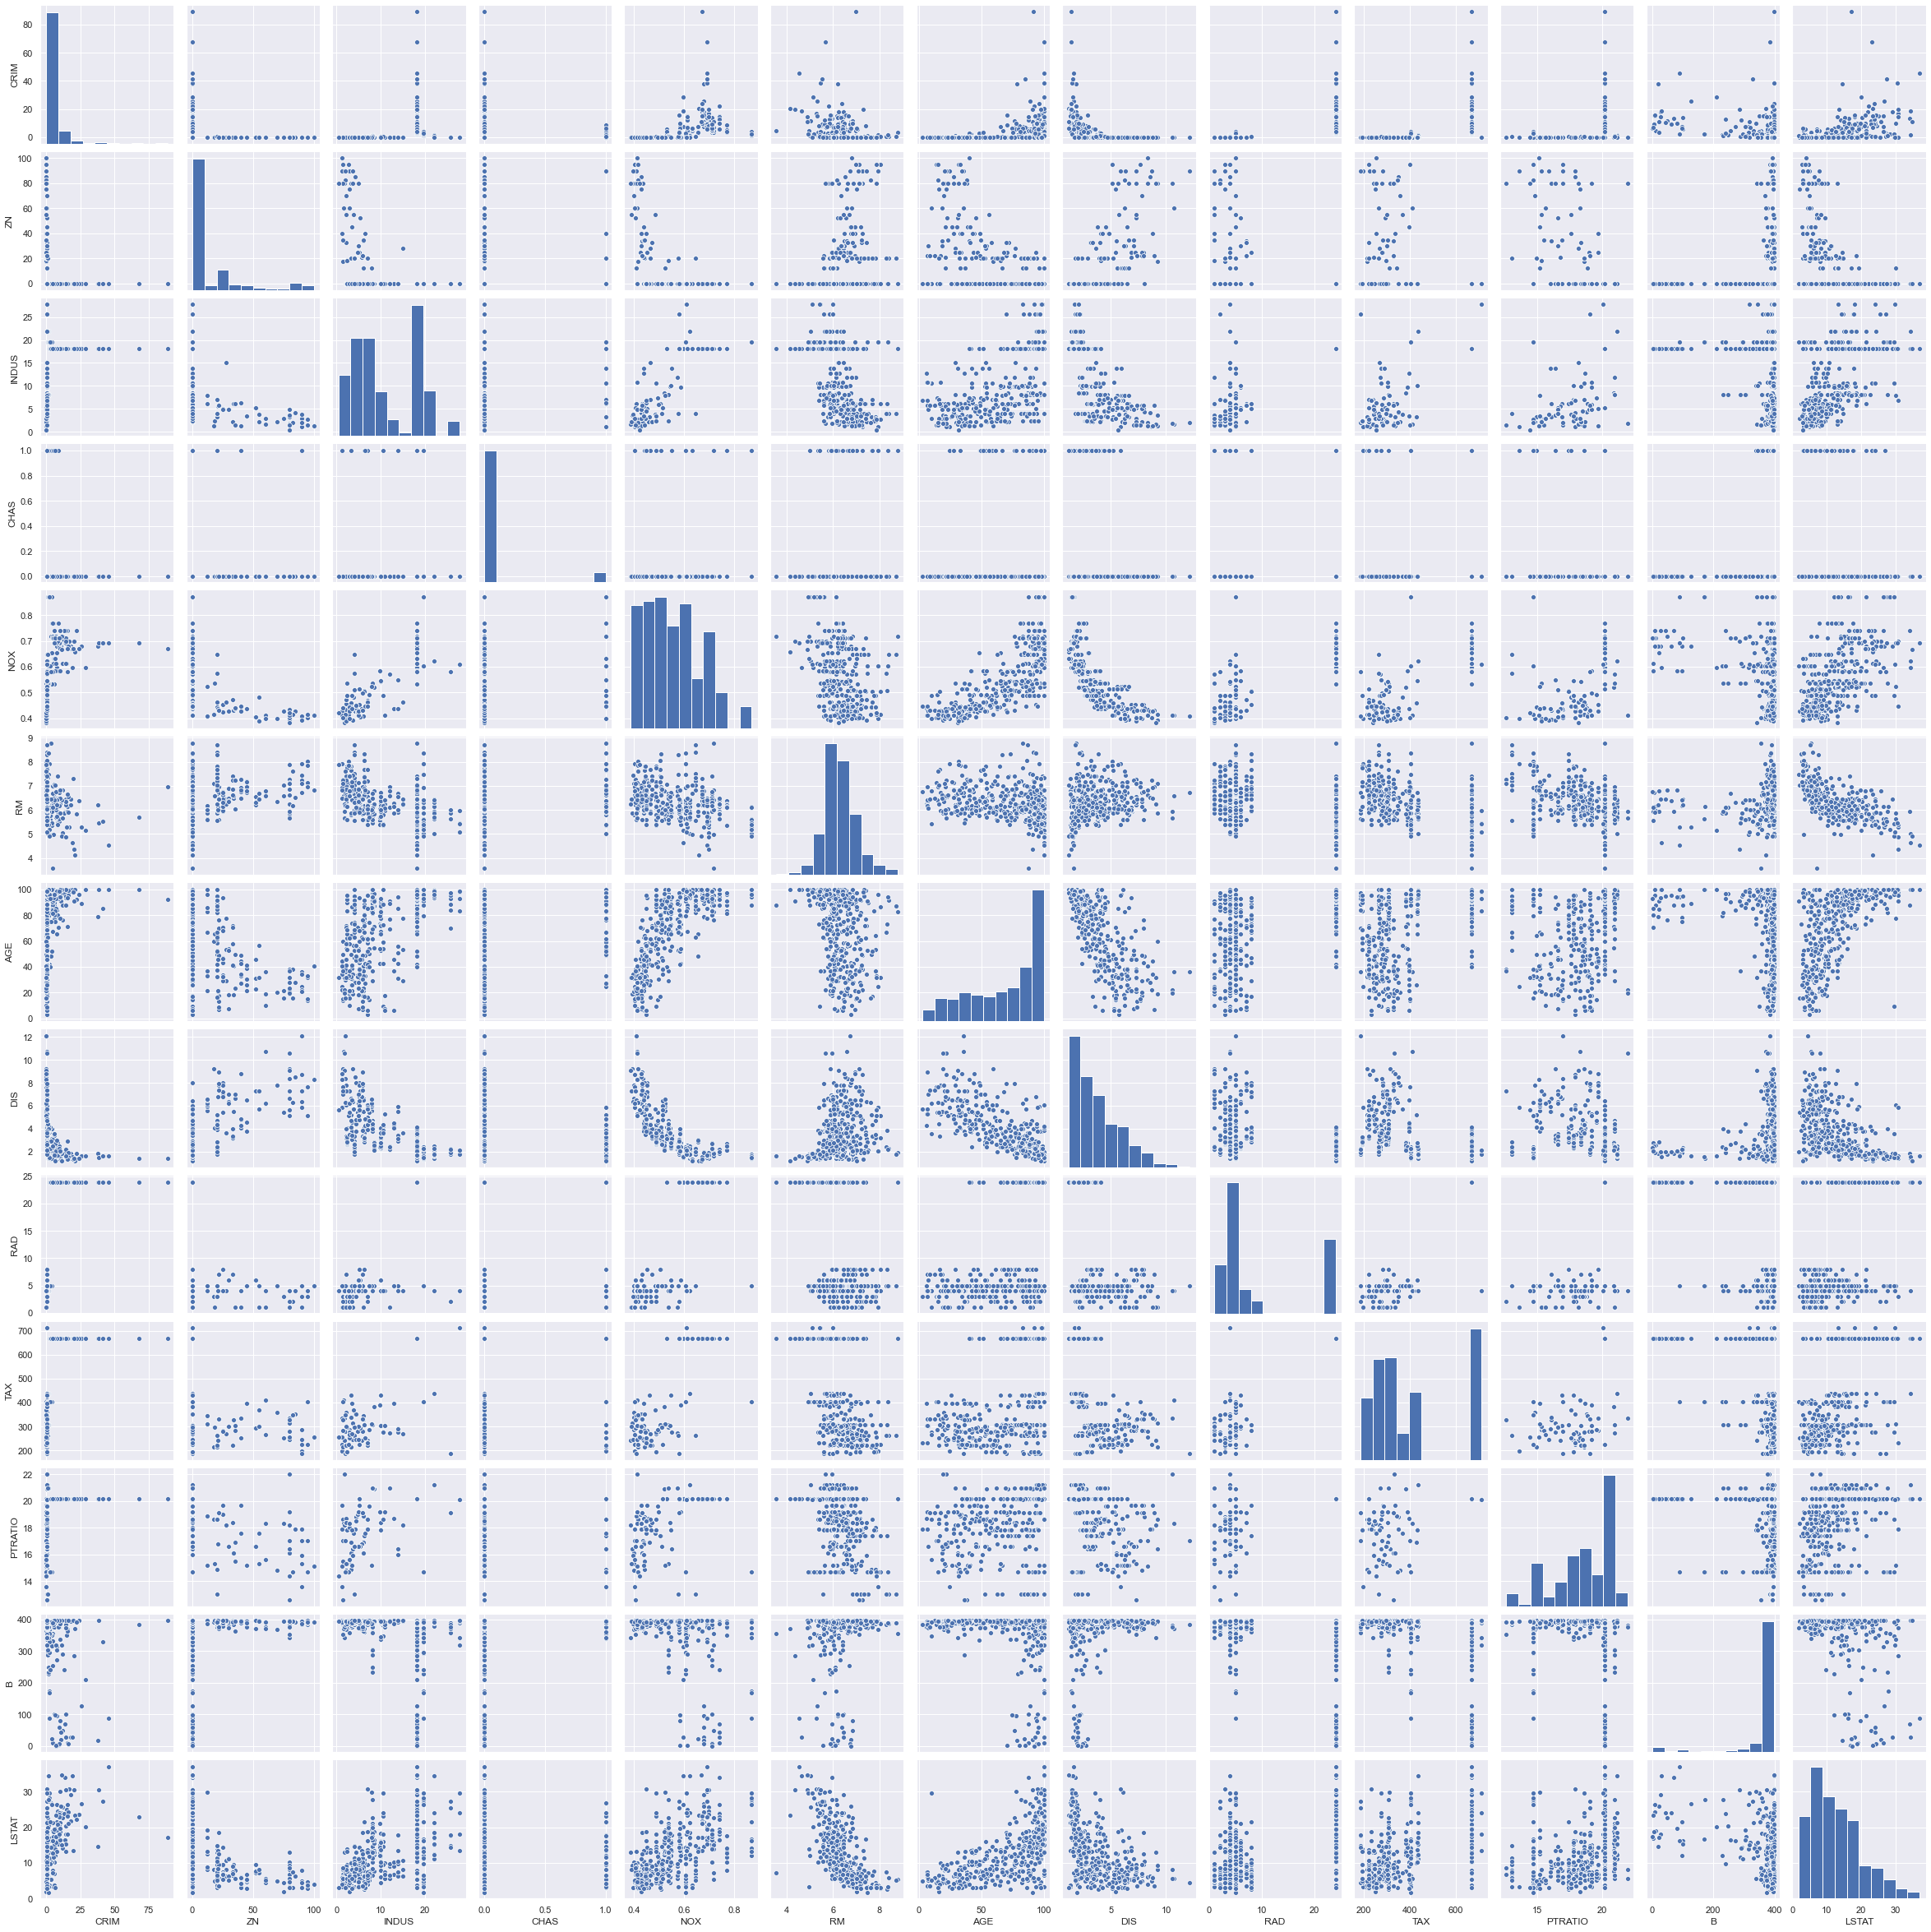

In [298]:
# check to see what our training data looks like
train_df = pd.DataFrame(X_train,columns=boston.feature_names)
train_df['MEDV'] = Y_train
sns.pairplot(train_df, vars = boston.feature_names)

### Use nonregularized linear regression to predict housing prices based on the 13 features

In [299]:
model = linear_model.LinearRegression().fit(X_train, Y_train)
#model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False).fit(X_train, Y_train)

In [300]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
Mean squared error: 33.45
Coefficient of determination: 0.59


Text(0, 0.5, 'Predicted Y')

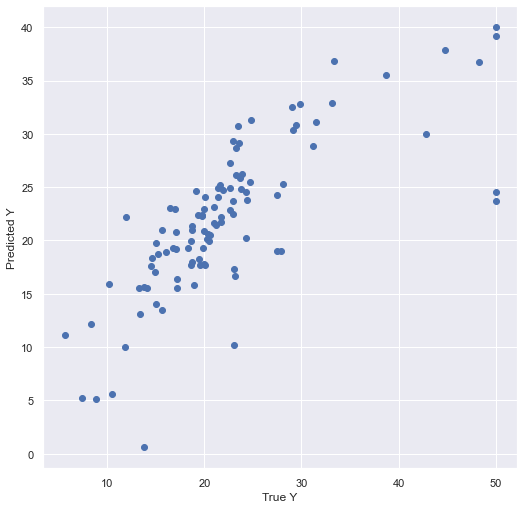

In [301]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

In [302]:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test, Y_test_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

Mean squared error: 33.45
Mean absolute error: 3.84
Root mean squared error: 5.78


In [303]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_test_pred})
pred_df.head()

,Actual,Predicted
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823


### Use L2-regularized linear regression to predict housing prices based on the 13 features

In [287]:
model = linear_model.Ridge().fit(X_train, Y_train)

# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [-1.36203803  0.29168997 -0.16731105  0.49413433 -2.05388587  1.7898986
  0.42285177 -3.08674231  2.19572532 -1.83684716 -2.0519561   0.59819783
 -5.16762115]
Mean squared error: 26.29
Coefficient of determination: 0.68


### Use L1-regularized linear regression to predict housing prices based on the 13 features

In [288]:
model = linear_model.Lasso().fit(X_train, Y_train)

# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [-0.          0.         -0.          0.         -0.          1.61900857
  0.         -0.         -0.         -0.         -1.51095117  0.
 -4.87805182]
Mean squared error: 35.94
Coefficient of determination: 0.56


### Can we improve our model?

Some of the relationships appear to be non-linear, let's try log-transformation of some features

In [289]:
boston_df["LOGLSTAT"] = boston_df["LSTAT"].apply(np.log)
boston_df["LOGDIS"] = boston_df["DIS"].apply(np.log)
boston_df["LOGAGE"] = boston_df["AGE"].apply(np.log)

In [290]:
transformed_boston_df_X = boston_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','LOGAGE','LOGDIS','RAD','TAX','PTRATIO','B','LOGLSTAT']]
transformed_boston_df_Y = boston_df[['MEDV']]

In [291]:
X_train, X_test, Y_train, Y_test = train_test_split(transformed_boston_df_X, transformed_boston_df_Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [292]:
model = linear_model.LinearRegression().fit(X_train, Y_train)
#model = linear_model.Lasso().fit(X_train, Y_train)
#model = linear_model.Ridge().fit(X_train, Y_train)

# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [[-1.60418017e-01  1.28869297e-02 -2.14789349e-02  1.92797840e+00
  -1.81466399e+01  2.52337148e+00  7.03451613e-01 -5.81983819e+00
   2.61987756e-01 -1.13307373e-02 -9.52748817e-01  6.53054838e-03
  -8.65230333e+00]]
Mean squared error: 26.17
Coefficient of determination: 0.68


### Hmmm, what else can we do? Maybe a polynomial fit?

Let's try to fit a second degree polynomial to the data

In [293]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly.fit(X_train_poly, Y_train) 
model = linear_model.LinearRegression().fit(X_train_poly, Y_train) 

# The coefficients:
#print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test_poly)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 18.66
Coefficient of determination: 0.77


Text(0, 0.5, 'Predicted Y')

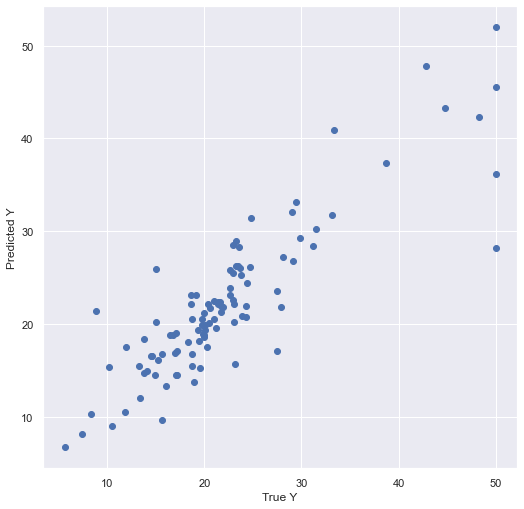

In [294]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')